<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_51/TidyTuesday_Burgernomics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Packages and Data

**Packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

**Data**

In [3]:
# Data
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-12-22/big-mac.csv')

# Inspect
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,usd_raw,eur_raw,gbp_raw,jpy_raw,cny_raw,gdp_dollar,adj_price,usd_adjusted,eur_adjusted,gbp_adjusted,jpy_adjusted,cny_adjusted
0,2000-04-01,ARG,ARS,Argentina,2.50,1.00,2.500000,-0.00398,0.05007,-0.16722,-0.09864,1.09091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-04-01,AUS,AUD,Australia,2.59,1.68,1.541667,-0.38579,-0.35246,-0.48645,-0.44416,0.28939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-04-01,BRA,BRL,Brazil,2.95,1.79,1.648045,-0.34341,-0.30778,-0.45102,-0.40581,0.37836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-04-01,CAN,CAD,Canada,2.85,1.47,1.938776,-0.22758,-0.18566,-0.35417,-0.30099,0.62152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-04-01,CHE,CHF,Switzerland,5.90,1.70,3.470588,0.38270,0.45774,0.15609,0.25130,1.90267,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning and Data Viz Prep

In [ ]:
# Convert to date time
df['date'] = pd.to_datetime(df['date'])

# Make time series for these countries and their respective currency
plot_countries = ['Switzerland', 'Denmark', 'Australia', 'Britain', 'Brazil', 'South Korea', 'Uruguay', 'Thailand']
plot_country_currency = ['Franc', 'Krone', 'A$', 'Pound', 'Real', 'Won', 'Peso', 'Bhat']

# Filter df to the most recent index. Use this for swarm plot
df_most_recent = df[df['date'] == df['date'].max()]

# Conditionally fill a column to describe if currency is over or under values
df_most_recent['under_over'] = np.where(df_most_recent['usd_raw'] < 0, 'Under', 'Over')

# Visualization

I found the color values from the Burgernomics logo/picture using [this site](https://imagecolorpicker.com/en/). Burgernomics logo/picture [is here](https://www.economist.com/sites/default/files/20180707_WOC666.png).

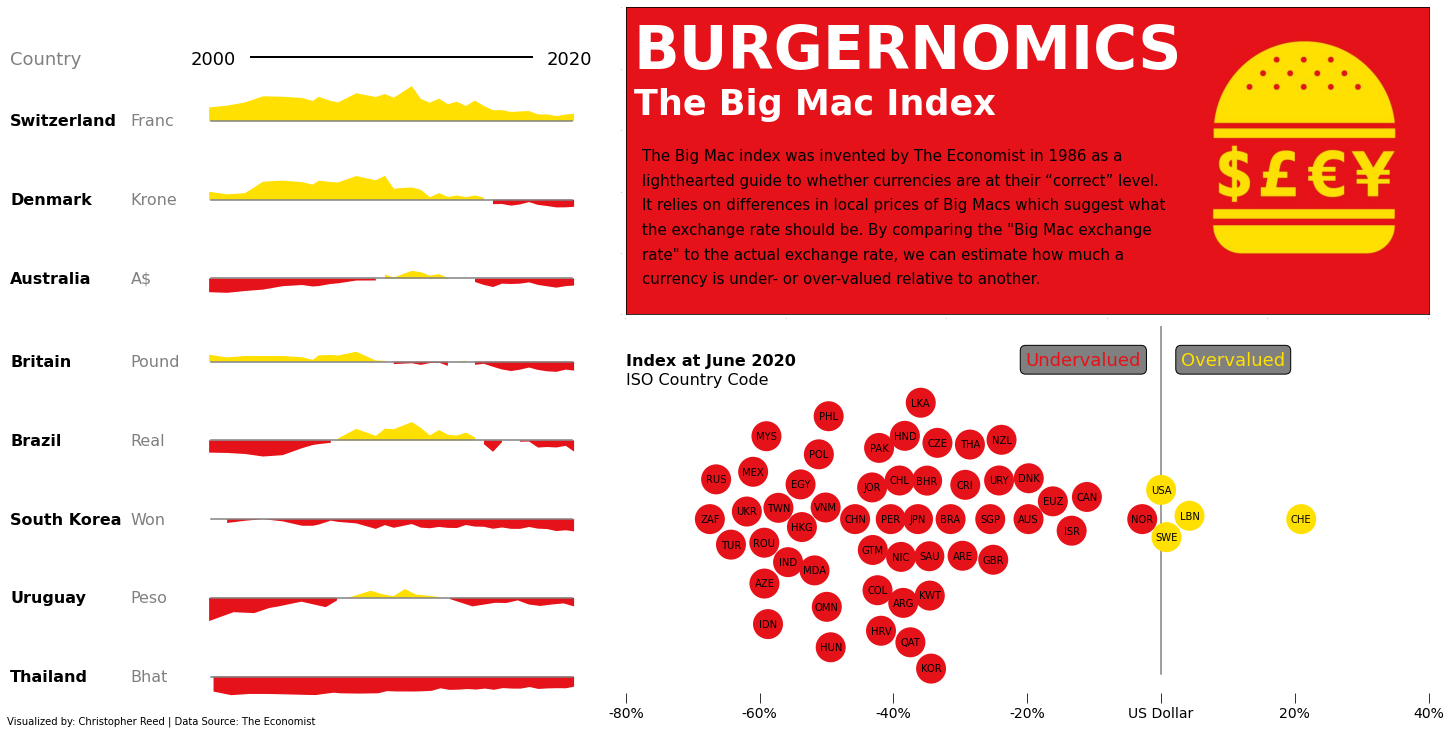

In [24]:
###################################
### MAKE FIGURE USING GRID SPEC ###
###################################

# Grid spec will have 9 rows and 3 columns
fig = plt.figure(constrained_layout=True, figsize = (20,10))
gs = fig.add_gridspec(9, 3)

# These are the 6 mini plots on the side
# Each mini plot gets 1 row
mini_ax1 = fig.add_subplot(gs[0, 0])
mini_ax2 = fig.add_subplot(gs[1, 0])
mini_ax3 = fig.add_subplot(gs[2, 0])
mini_ax4 = fig.add_subplot(gs[3, 0])
mini_ax5 = fig.add_subplot(gs[4, 0])
mini_ax6 = fig.add_subplot(gs[5, 0])
mini_ax7 = fig.add_subplot(gs[6, 0])
mini_ax8 = fig.add_subplot(gs[7, 0])
mini_ax9 = fig.add_subplot(gs[8, 0])

# Include all but the first one. First one will be used for column titles.
mini_plots = [mini_ax2, mini_ax3,mini_ax4, mini_ax5,
              mini_ax6, mini_ax7, mini_ax8, mini_ax9]

# Two main plots
main_ax1 = fig.add_subplot(gs[0:4, 1:])
main_ax2 = fig.add_subplot(gs[4:, 1:])

###################################
### MAIN TITLES FOR SMALL PLOTS ###
###################################

# Titles
mini_ax1.text(-0.45, 0.2, 'Country', fontsize = 18, color = 'grey')
mini_ax1.text(0, 0.2, '2000', fontsize = 18, color = 'black', ha = 'left')
mini_ax1.text(1.0, 0.2, '2020', fontsize = 18, color = 'black', ha = 'right')

# Line between `2000` and `2020`
mini_ax1.axhline(y = 0.3, xmin = 0.15, xmax = 0.85, color = 'black', lw = 2)

# Turn off all spines and ticks
mini_ax1.axis('off')

######################################################
### SIX SMALL PLOTS FOR UNDER/OVER VALUE OVER TIME ###
######################################################

# Iterate through list of countries, currencies, and mini plots
for country, currency, index_plot in zip(plot_countries, plot_country_currency, mini_plots):

  # Filter to country
  df_country_filter = df[df['name'] == country]

  # Use fill between to color positive section of time series yellow and negative section red
  index_plot.fill_between(df_country_filter['date'],
                          y1 = df_country_filter['usd_raw'],
                          where = df_country_filter['usd_raw'] > 0,
                          facecolor = '#ffe001')
  
  index_plot.fill_between(df_country_filter['date'],
                          y1 = df_country_filter['usd_raw'],
                          where = df_country_filter['usd_raw'] <= 0,
                          facecolor = '#e61219')

  # Horizontal line at 0
  index_plot.axhline(xmin = 0.05,
                     xmax= 0.95,
                     color = 'grey')
  
  # Country text
  index_plot.text(-0.45, 0.5,
                  country,
                  transform = index_plot.transAxes,
                  fontsize = 16,
                  color = 'black',
                  weight = 'bold',
                  va = 'center',
                  ha = 'left')
  
  # Currency text
  index_plot.text(-0.15, 0.5,
                  currency,
                  transform = index_plot.transAxes,
                  fontsize = 16,
                  color = 'grey',
                  va = 'center',
                  ha = 'left')
  
  # Set ylim so all plots are comparable
  index_plot.set_ylim(bottom  = -1, top = 1)

  # Turn off all spines and ticks
  index_plot.axis('off')

##############################################
### LARGE SWARM PLOT SHOWING JUNE 2020 DATA ###
###############################################

# Swarm plot using Seaborn
# Need to have dummy `y` data in order for `hue` argument to work
# Multiply by 100 for decimal --> percent
sns.swarmplot(x = df_most_recent['usd_raw'] * 100,
              y = ['']*len(df_most_recent),
              hue = df_most_recent['under_over'],
              ax = main_ax2,
              palette = {'Under':'#e61219',
                         'Over':'#ffe001'},
              size = 30)

# Extract coordinate of swarm plot
# Based on this Stack Overflow response: https://stackoverflow.com/questions/60969052/plot-another-point-on-top-of-swarmplot
artists = main_ax2.get_children()
offsets = []
for a in artists:
  if type(a) is matplotlib.collections.PathCollection:
    offsets = a.get_offsets()
    break

# All the country codes for most recent index
country_codes = df_most_recent.sort_values(by = 'usd_raw', ascending = True)['iso_a3'].to_list()

# Plot country codes over swarm plot
for position, country_code in enumerate(country_codes):
  
  main_ax2.text(x = offsets[position, 0],
                y = offsets[position, 1],
                s = country_code,
                ha = 'center',
                va = 'center')



# Vertical line for US dollar
main_ax2.axvline(x = 0,
                 ymin = 0.1,
                 ymax = 1,
                 color = 'grey')

# Under/Over value text
main_ax2.text(x = -3, y = -0.4,
              s = 'Undervalued',
              color = '#e61219',
              ha = 'right',
              fontsize = 18,
              bbox = dict(facecolor = 'grey', boxstyle = 'round'))

# Under/Over value text
main_ax2.text(x = 3, y = -0.4,
              s = 'Overvalued',
              color = '#ffe001',
              ha = 'left',
              fontsize = 18,
              bbox = dict(facecolor = 'grey', boxstyle = 'round'))

# Title text
main_ax2.text(x = -80, y = -0.40,
              s = 'Index at June 2020',
              fontsize = 16,
              ha = 'left',
              weight = 'bold')

# ISO Country Code text
main_ax2.text(x = -80, y = -0.35,
              s = 'ISO Country Code',
              fontsize = 16,
              ha = 'left')

  
# Remove legend from swarm plot
main_ax2.legend_.remove()

# Move bottom spine of swarm plot
main_ax2.spines['bottom'].set_position(('data', 0.45))

# Tweak tick params of both x and y axis for swarm plot
main_ax2.tick_params(axis = 'x', length = 10, labelsize = 14)
main_ax2.tick_params(axis = 'y', length = 0)

# Set x-axis limits
main_ax2.set_xlim(left = -80, right = 40)

# Remove all spines
main_ax2.spines['bottom'].set_visible(False)
main_ax2.spines['right'].set_visible(False)
main_ax2.spines['top'].set_visible(False)
main_ax2.spines['left'].set_visible(False)

# Remove x-axis label
main_ax2.set_xlabel('')

# Format x tick labels
main_ax2.set_xticklabels(['-80%', '-60%', '-40%', '-20%', 'US Dollar', '20%', '40%'])

####################################
### ADD BURGER LOGO TO MAIN PLOT ###
####################################

# Burger logo
im = plt.imread('/content/burgernomics_logo_2.jpg')
burger_ax = fig.add_axes([0.8, 0.65, 0.2, 0.3], zorder=1, anchor = 'C')
burger_ax.imshow(im)
burger_ax.axis('off')

# Face color of main plot with burger logo
main_ax1.set_facecolor('#e61219')

######################
### MAIN PLOT TEXT ###
######################
main_ax1.text(0.01, 0.80, 'BURGERNOMICS', color = 'white', fontsize = 60, weight = 'bold', ha = 'left')
main_ax1.text(0.01, 0.65, 'The Big Mac Index', color = 'white', fontsize = 35, weight = 'bold', ha = 'left')

txt = """The Big Mac index was invented by The Economist in 1986 as a
lighthearted guide to whether currencies are at their “correct” level.
It relies on differences in local prices of Big Macs which suggest what
the exchange rate should be. By comparing the "Big Mac exchange
rate" to the actual exchange rate, we can estimate how much a
currency is under- or over-valued relative to another."""

main_ax1.text(0.02,0.1,
              txt,
              fontsize = 15,
              linespacing = 1.8,
              ha = 'left')

main_ax1.tick_params(axis = 'both',
                    length = 0,
                    labelsize = 0)

###############
### CREDITS ###
###############

fig.text(0, 0, 'Visualized by: Christopher Reed | Data Source: The Economist')

# Save using dpi argumen for higher quality jpg
plt.savefig('Burgernomics.jpg', bbox_inches = 'tight', dpi = 1200)